# Download artist images

We want images of faces for rap, rock, and country artists.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
import json
import time
import re
from collections import Counter
import pickle
import cv2
from google_images_download import google_images_download

In [2]:
# Change the Matplotlib defaults
colors = np.array([(182,109,255),(218,109,0),(0,146,146)])/255
plt.rcParams.update({'font.size': 16, 'figure.figsize': (12.0, 6.0)})
plt.style.use('seaborn')
%matplotlib inline

## google_images_download

https://google-images-download.readthedocs.io/en

In [3]:
response = google_images_download.googleimagesdownload()

Willie Nelson


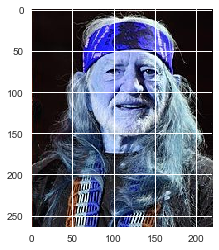

Kanye West


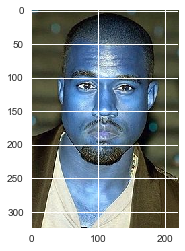

In [5]:
artist_names = ["Willie Nelson", "Kanye West"]
output_dir = "./face_image_downloads"
for n, query in enumerate(artist_names):
    prefix = query.replace(" ", "_")
    args = {"keywords": query, "limit": 1, "prefix": prefix, "silent_mode": True,
            "output_directory": output_dir, "no_directory": True, "delay": 2,
            "save_source": "face_image_urls", "print_urls": False}
    image_path = response.download(args)
    if n % 10 == 0 or True:
        print(query)
        path = image_path[0][query][0]
        image = cv2.imread(path)
        plt.imshow(image)
        plt.show()

## Where are the images hosted?

In [17]:
from collections import Counter

In [19]:
domains = Counter(map(lambda x: x.split(".com")[0].replace("https://", ""), image_urls.values()))
domains

Counter({'images.genius': 259,
         's3.amazonaws': 35,
         'assets.genius': 7,
         'images.rapgenius': 1,
         'i.genius': 1})

# Download and save the images

Or would it be better to not download them, just accessing each URL as I do the face detection?

In [20]:
import requests
import time

In [21]:
t0 = time.time()
prefix = "./data/images/"
error_count = 0
for n, (genre_artist, url) in enumerate(image_urls.items()):
    # Format the filename
    genre, artist = genre_artist.split("_", 1)
    ext = url.rsplit(".")[-1]
    fp = prefix + genre_artist + "." + ext
    if n % 10 == 0:
        print(f"({n + 1:3.0f}/{len(image_urls)}): {fp}")

    # Download the image
    r = requests.get(url, stream=True)
    if r.status_code == 200:
        image = r.raw.read()
        open(fp, "wb").write(image)
    else:
        error_count += 1
        print(f"(n={n})\nBad status code: {r.status_code}")
        print(f"Time elapsed: {(time.time() - t0) / 60:.2f} minutes.")
        print(f"Error count: {error_count}")
        time.sleep(3 * 60) # Wait three minutes
    time.sleep(2) # Wait two seconds
    if error_count >= 3:
        print("Too many errors. Quitting.")
        continue
print(f"Total time elapsed: {(time.time() - t0) / 60:.2f} minutes.")

(  1/303): ./data/images/RAP_MALE_2177_2Pac.png
( 11/303): ./data/images/RAP_MALE_1605981_André_3000.jpg
( 21/303): ./data/images/RAP_MALE_29497_Ludacris.jpg
( 31/303): ./data/images/RAP_MALE_86146_Tech_N9ne.png
( 41/303): ./data/images/RAP_MALE_72696_Chance_The_Rapper.jpg
( 51/303): ./data/images/RAP_FEMALE_33152_Missy_Elliott.jpg
( 61/303): ./data/images/RAP_MALE_64175_ScHoolboy_Q.jpg
( 71/303): ./data/images/RAP_MALE_18463_E-40.jpg
( 81/303): ./data/images/RAP_MALE_1830343_B.o.B.jpg
( 91/303): ./data/images/RAP_FEMALE_38257_Queen_Latifah.jpg
(101/303): ./data/images/RAP_FEMALE_1464028_Da_Brat.jpg
(111/303): ./data/images/RAP_FEMALE_2081105_Shawnna.jpg
(121/303): ./data/images/RAP_FEMALE_13852_Ciara.png
(131/303): ./data/images/RAP_FEMALE_34208_Ms._Dynamite.jpg
(141/303): ./data/images/ROCK_MALE_99899_Green_Day.jpg
(151/303): ./data/images/ROCK_MALE_387881_Paul_McCartney.jpg
(161/303): ./data/images/ROCK_MALE_941697_George_Harrison.jpg
(171/303): ./data/images/ROCK_MALE_3582841_Creed